In [2]:
import os
import importlib , pck, pandas as pd # Importar importlib para recargar módulos
from dotenv import load_dotenv

dotenv_path = os.path.join(os.getcwd(), '..', '.env')
importlib.reload(pck)
from pck import PCK

# Configuracion
detector_path = os.path.join(os.getenv('BASE_PATH'), os.getenv('VITPOSE_SUBPATH'), os.getenv('DETECTOR_SUBPATH'))
estimator_path = os.path.join(os.getenv('BASE_PATH'), os.getenv('VITPOSE_SUBPATH'), os.getenv('POSE_SUBPATH'))
images_path = os.path.join(os.getenv('BASE_PATH'), os.getenv('IMAGES_SUBPATH'))
labels_path = os.path.join(os.getenv('BASE_PATH'), os.getenv('LABELS_SUBPATH'))
evaluator = PCK(os.getenv('BASE_PATH'), images_path, labels_path, detector_path, estimator_path)
thresholds = [0.1, 0.5, 0.9]

Cargando modelos en el dispositivo: cpu


`use_fast` is set to `True` but the image processor class does not have a fast version.  Falling back to the slow version.


# Evaluando una imagen

In [3]:
image = 'imagen_062_jpg.rf.67b212e193dcccad590e8a4eb2dc24cc.jpg'
results = []
for threshold in thresholds:
    results = evaluator.evaluate_image(image, threshold, results)

PCK: 90.00%, Total true: 17, Visible true: 10, Total pred (modelo): 17, Correctos: 9
PCK: 100.00%, Total true: 17, Visible true: 10, Total pred (modelo): 17, Correctos: 10
PCK: 100.00%, Total true: 17, Visible true: 10, Total pred (modelo): 17, Correctos: 10


# Infernecia de una imagen

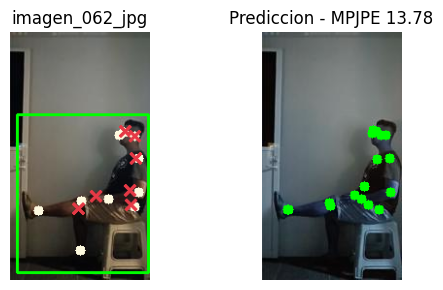

In [4]:
import re
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(6, 3)) 
image_path = os.path.join(images_path, image)
label_path = os.path.join(labels_path, os.path.splitext(image)[0] + '.txt')

img_with_original_keypoints = evaluator.draw_original_keypoints(image_path, label_path)
img_with_predicted_keypoints, inference_results = evaluator.draw_predicted_keypoints(image_path)

# extraer todo lo que esta antes de '.rf'
match = re.match(r"^(.*?)(_jpg)\.rf\.", image)

image_name = match.group(1) + match.group(2) if match else 'Not found'

# Mostrar la imagen con etiquetas originales
axes[0].imshow(img_with_original_keypoints)
axes[0].set_title(f'{image_name}')
axes[0].axis('off')

# Mostrar la imagen con etiquetas predichas
axes[1].imshow(img_with_predicted_keypoints)
axes[1].set_title(f'Prediccion - MPJPE 13.78')
axes[1].axis('off')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

# Evaluando multiples imagenes

In [5]:
# Obtener la lista de todas las imágenes en la carpeta
image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]
image_files_sorted = sorted(image_files)
results = []

for image in image_files_sorted:
    for threshold in thresholds:
        results = evaluator.evaluate_image(image, threshold, results)

PCK: 100.00%, Total true: 17, Visible true: 12, Total pred (modelo): 17, Correctos: 12
PCK: 100.00%, Total true: 17, Visible true: 12, Total pred (modelo): 17, Correctos: 12
PCK: 100.00%, Total true: 17, Visible true: 12, Total pred (modelo): 17, Correctos: 12
PCK: 100.00%, Total true: 17, Visible true: 11, Total pred (modelo): 17, Correctos: 11
PCK: 100.00%, Total true: 17, Visible true: 11, Total pred (modelo): 17, Correctos: 11
PCK: 100.00%, Total true: 17, Visible true: 11, Total pred (modelo): 17, Correctos: 11
PCK: 100.00%, Total true: 17, Visible true: 17, Total pred (modelo): 17, Correctos: 17
PCK: 100.00%, Total true: 17, Visible true: 17, Total pred (modelo): 17, Correctos: 17
PCK: 100.00%, Total true: 17, Visible true: 17, Total pred (modelo): 17, Correctos: 17
PCK: 100.00%, Total true: 17, Visible true: 13, Total pred (modelo): 17, Correctos: 13
PCK: 100.00%, Total true: 17, Visible true: 13, Total pred (modelo): 17, Correctos: 13
PCK: 100.00%, Total true: 17, Visible true:

# Generando el XLS

In [6]:
# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results)
output_excel_path = os.path.join(os.getenv('BASE_PATH'), os.getenv('VITPOSE_SUBPATH'), 'precision', 'PCK', 'vitpose_pck_results.xlsx')
df_results.to_excel(output_excel_path, index=False, engine='openpyxl')

print(f"Los resultados se han guardado en {output_excel_path}")

Los resultados se han guardado en /Users/apple/Documents/pose_estimation/ViTPosev4.57/precision/PCK/vitpose_pck_results.xlsx
